## Exploratory Data Analysis (EDA) - Linear Regression
---
**Elo notes**


### [Scaling](https://en.wikipedia.org/wiki/Feature_scaling)

Feature scaling or data normalization  is a method used to standardize the range of independent variables or features of data. 

In some machine learning algorithms, objective functions will not work properly without normalization. For example, the majority of classifiers calculate the distance between two points by the Euclidean distance. If one of the features has a broad range of values, the distance will be governed by this particular feature. Therefore, the range of all features should be normalized so that each feature contributes approximately proportionately to the final distance. 

Another reason why feature scaling is applied is that gradient descent converges much faster with feature scaling than without it

#### Mean normalization

${\displaystyle x'={\frac {x-{\text{average}}(x)}{{\text{max}}(x)-{\text{min}}(x)}}} $

#### Standardization

$x' = \frac{x - \bar{x}}{\sigma}$

In machine learning, we can handle various types of data, e.g. audio signals and pixel values for image data, and this data can include multiple dimensions. Feature standardization makes the values of each feature in the data have zero-mean (when subtracting the mean in the numerator) and unit-variance. 

This method is widely used for normalization in many machine learning algorithms (e.g., support vector machines, logistic regression, and artificial neural networks)

#### Scaling to unit length

Scale the components of a feature vector such that the complete vector has length one.

${\displaystyle x'={\frac {x}{||x||}}}$


### [IMPORTANT! Errors and residuals](https://en.wikipedia.org/wiki/Errors_and_residuals)

**In statistics and optimization, errors and residuals are two closely related and easily confused measures of the deviation of an observed value of an element of a statistical sample from its "theoretical value".**

One can **standardize statistical errors** (especially of a normal distribution) in a **z-score** (or "standard score"), and **standardize residuals in a t-statistic**, or more generally **studentized residuals.** 

**Important:** 

The **error ( $\boldsymbol \varepsilon$ or disturbance)** of **an observed value** is the deviation of the observed value from the **(unobservable) TRUE VALUE** of a quantity of interest (for example, a **Population Mean**), 

and the **residual** of **an observed value** is the difference between the observed value and the **ESTIMATED VALUE** of the quantity of interest (for example, a **Sample Mean**). 

The distinction is most important in regression analysis, where the concepts are sometimes called the regression errors and regression residuals and where they lead to the concept of studentized residuals. 

The expected value, being the mean of the entire population, is typically **unobservable, and hence the statistical error cannot be observed either.**

A residual (or fitting deviation), on the other hand, is an **observable estimate of the un observable statistical error.** The sample mean could serve as a good **estimator of the population mean.**

Suppose there is a series of observations from a univariate distribution and we want to estimate the mean of that distribution (the so-called location model). In this case, the errors are the deviations of the observations from the population mean, while the residuals are the deviations of the observations from the sample mean.

For example, if the mean height in a **population** of 21-year-old men is 1.75 meters, and one randomly chosen man is 1.80 meters tall, then the "error" is 0.05 meters; if the randomly chosen man is 1.70 meters tall, then the "error" is −0.05 meters. The expected value, being the mean of the entire population, is typically **unobservable, and hence the statistical error cannot be observed either.**

- The difference between the height of each man in the sample and the **unobservable population mean is a statistical error**, whereas

- The difference between the height of each man in the sample and the **observable sample mean is a residual.**

Note that, because of the definition of the sample mean, the sum of the residuals within a random sample is necessarily zero, and thus the residuals are necessarily not independent. The statistical errors, on the other hand, are independent, and their sum within the random sample is almost surely not zero. 


#### [Maximum Likelihood Estimation MLE](https://en.wikipedia.org/wiki/Maximum_likelihood_estimation)

In statistics, **maximum likelihood estimation (MLE) is a method** of **estimating the parameters** of a **statistical model** given observations, by finding the parameter values that maximize the likelihood of making the observations given the parameters.

The method of maximum likelihood corresponds to many well-known estimation methods in statistics. For example, one may be interested in the heights of adult female penguins, but be unable to measure the height of every single penguin in a population due to cost or time constraints. Assuming that the heights are normally distributed with some unknown mean and variance, the mean and variance can be estimated with MLE while only knowing the heights of some sample of the overall population. 

**MLE** would accomplish this by taking the **mean** and **variance** as **parameters** and finding particular parametric values that make the observed results the most probable given the model.

 $${\displaystyle {\hat {\ell }}(\theta ;x)}$$




---
#### [Ordinary Least Squares (OLS)](https://en.wikipedia.org/wiki/Ordinary_least_squares)

**Ordinary least squares (OLS)** or **linear least squares** is a **method for estimating the unknown parameters in a linear regression model**.

OLS has the goal of minimizing the sum of the squares of the differences between **the observed responses** in the given dataset and those **predicted by a linear function** of a **set of explanatory variables** (visually this is seen as the sum of the vertical distances between each data point in the set and the corresponding point on the regression line – the smaller the differences, the better the model fits the data). 

The OLS [**estimator**](https://en.wikipedia.org/wiki/Estimator) is [**consistent**](https://en.wikipedia.org/wiki/Consistent_estimator) when the regressors are exogenous(an exogenous variable is independent of the random error term in the linear model.), and optimal in the class of linear unbiased estimators when the errors are homoscedastic and serially uncorrelated.

Under the additional assumption that the errors be normally distributed, OLS is the maximum likelihood estimator. 

OLS is used in fields as diverse as economics (econometrics) and electrical engineering (control theory and signal processing).


$$y_{i}=\hat{y}=\beta _{1}x_{i1}+\cdots +\beta _{p}x_{ip}+\varepsilon _{i},\qquad i=1,\ldots ,n,$$

the linear model in **vector** form we need to transponse the **X** matrix

$$y_{i}=\hat{y}=\mathbf {x} _{i}^{\rm {T}}{\boldsymbol {\beta }}+\varepsilon _{i},\qquad$$

where **T** denotes the transpose of the **vector** of values of $\boldsymbol {p}$ predictor 

**$\boldsymbol {x_{ij}}$ for j = 1, ...p,** 

so that 

$\boldsymbol {x_i^T\beta}$ is the inner product between vectors $\boldsymbol {x_{ij}}$ ( **n x ** $\boldsymbol p$ matrix ) and $\boldsymbol {\beta}$ ( **p** x $\boldsymbol {1}$ vector of unknown parameter)

model in matrix notation

$\mathbf {y} =\mathbf {X} {\boldsymbol {\beta }}+{\boldsymbol {\varepsilon }},\,$

where

 $\mathbf{y} = \begin{pmatrix} y_1 \\ y_2 \\ \vdots \\ y_n \end{pmatrix}, \quad$
 
 $\mathbf{X} = \begin{pmatrix} \mathbf{x}^{\rm T}_1 \\ \mathbf{x}^{\rm T}_2 \\ \vdots \\ \mathbf{x}^{\rm T}_n \end{pmatrix}
 = \begin{pmatrix} x_{11} & \cdots & x_{1p} \\
 x_{21} & \cdots & x_{2p} \\
 \vdots & \ddots & \vdots \\
 x_{n1} & \cdots & x_{np}
 \end{pmatrix}, $
 
 
 $\boldsymbol\beta = \begin{pmatrix} \beta_1 \\ \beta_2 \\ \vdots \\ \beta_p \end{pmatrix}, \quad
 \boldsymbol\varepsilon = \begin{pmatrix} \varepsilon_1 \\ \varepsilon_2 \\ \vdots \\ \varepsilon_n \end{pmatrix}.$
 
 
 Note: [Matrix multiplication](https://en.wikipedia.org/wiki/Matrix_multiplication): If **X** is an **n x ** $\boldsymbol {p}$ ** matrix** and **$\boldsymbol {\beta}$** is an $\boldsymbol {p}$ ** x 1 matrix**


#### [Linear Least Square](https://en.wikipedia.org/wiki/Least_squares)

$\min \sum_i (y_i - \hat{Y_i})^2=\sum_i e_i^2\ $ 


where:

$ SS_\text{res}=\sum_i (y_i - \hat{Y_i})^2=\sum_i e_i^2\ $  The sum of squares of residuals, also called the residual sum of squares

A justification for choosing this criterion is given in properties below. This minimization problem has a unique solution, provided that the n columns of the matrix $\mathbf {X}$ are linearly independent, given by solving the normal equations

$(\mathbf {X} ^{\rm {T}}\mathbf {X} ){\hat {\boldsymbol {\beta }}}=\mathbf {X} ^{\rm {T}}\mathbf {y} .$

The matrix $ \mathbf {X} ^{\rm {T}}\mathbf {X}$ is known as the Gramian matrix of $\mathbf {X} $, which possesses several nice properties such as being a positive semi-definite matrix, and the matrix $ {\displaystyle \mathbf {X} ^{\rm {T}}\mathbf {y} }$ is known as the moment matrix of regressand by regressors.

Finally, ${\hat {\boldsymbol {\beta }}}$ is the coefficient vector of the least-squares hyperplane, expressed as

${\displaystyle {\hat {\boldsymbol {\beta }}}=(\mathbf {X} ^{\rm {T}}\mathbf {X} )^{-1}\mathbf {X} ^{\rm {T}}\mathbf {y} .}$

#### ${\beta}$ matrix form

$$\hat{\boldsymbol\beta} = (\mathbf{X}^{\rm T}\mathbf{X})^{-1} \mathbf{X}^{\rm T}\mathbf{y}$$

The matrix $ {\displaystyle (X^{T}X)^{-1}X^{T}}$ is called the [pseudoinverse matrix of $X$](https://en.wikipedia.org/wiki/Moore%E2%80%93Penrose_inverse). This formulation highlights the point that estimation can be carried out if, and only if, there is no perfect multicollinearity between the explanatory variables. 

Note: Connection to [MLE - Continuous distribution, continuous parameter space](https://en.wikipedia.org/wiki/Maximum_likelihood_estimation)


#### Just for fun - [Terminology](https://en.wikipedia.org/wiki/Regression_analysis)

${\boldsymbol {y_{i}}}$, is called the regressand, endogenous variable, response variable, measured variable, criterion variable, or dependent variable 

${\boldsymbol{x_{i1},\,x_{i2},\,\ldots ,\,x_{ip}}}$, are called regressors, exogenous variables, explanatory variables, covariates, input variables, predictor variables, or independent variables. The matrix $\mathbf {X}$ is sometimes called the design matrix.

Usually a constant is included as one of the regressors. For example, we can take $x_{i1} = 1$ for $i = 1, ..., n.$ The corresponding element of β is called the intercept. Many statistical inference procedures for linear models require an intercept to be present, so it is often included even if theoretical considerations suggest that its value should be zero.

Sometimes one of the regressors can be a non-linear function of another regressor or of the data, as in polynomial regression and segmented regression. The model remains linear as long as it is linear in the parameter vector β.
       
${\boldsymbol {\beta }}$, is a p-dimensional parameter vector. Its elements are also called effects, or regression coefficients. Statistical estimation and inference in linear regression focuses on ${\boldsymbol {\beta }}$. The elements of this parameter vector are interpreted as the partial derivatives of the dependent variable with respect to the various independent variables.

$\varepsilon _{i}$, is called the error term, disturbance term, or noise. This variable captures all other factors which influence the dependent variable $y_i$ other than the regressors $x_i$. The relationship between the error term and the regressors, for example whether they are correlated, is a crucial step in formulating a linear regression model, as it will determine the method to use for estimation.

Such a system usually has no solution, so the goal is instead to find the coefficients ${\beta }$ which fit the equations "best," in the sense of solving the quadratic minimization problem


#### [Mean Square Error MSE](https://en.wikipedia.org/wiki/Mean_squared_error)

The MSE assesses the quality of an **estimator (i.e., a mathematical function mapping a sample of data to a parameter of the population from which the data is sampled)** or a **predictor (i.e., a function mapping arbitrary inputs to a sample of values of some random variable).** Definition of an MSE **differs** according to whether one is describing an **[estimator](https://en.wikipedia.org/wiki/Estimator) or a [predictor](https://en.wikipedia.org/wiki/Residual_sum_of_squares)**

#### [Predictor](https://en.wikipedia.org/wiki/Residual_sum_of_squares)

If $\hat{Y}$ is a vector of $n$ predictions, and $Y$ is the vector of observed values of the variable being predicted, then the within-sample MSE of the predictor is computed as

$${\displaystyle \operatorname {MSE} ={\frac {1}{n}}\sum _{i=1}^{n}(Y_{i}-{\hat {Y_{i}}})^{2}.}$$

I.e., the MSE is the mean ${\displaystyle \left({\frac {1}{n}}\sum _{i=1}^{n}\right)}$ of the squares of the errors ${\displaystyle (Y_{i}-{\hat {Y_{i}}})^{2}}$ This is an easily computable quantity for a particular sample (and hence is sample-dependent).


**Predictor variable:** Is the independent variable and is sometimes called a , **"Feature" (in machine learning and pattern recognition)** or "input variable **regressor**, **covariate**, "controlled variable", "manipulated variable", "explanatory variable", exposure variable (see reliability theory), "risk factor" (see medical statistics)." In econometrics, the term "control variable" is usually used instead of "covariate"

**Response variable:** Is the dependent variable is sometimes called a **"Label" (in machine learning and pattern recognition)**, "regressand", "criterion", "predicted variable", "measured variable", "explained variable", "experimental variable", "responding variable", "outcome variable", "output variable".

#### [Estimator](https://en.wikipedia.org/wiki/Estimator)

The MSE of an estimator ${\displaystyle {\hat {\theta }}} $ with respect to an unknown parameter ${\displaystyle \theta }$ is defined as

${\displaystyle \operatorname {MSE} ({\hat {\theta }})=\operatorname {E} _{\hat {\theta }}\left[({\hat {\theta }}-\theta )^{2}\right].}$

This definition depends on the unknown parameter, and the MSE in this sense is a property of an estimator. Since an MSE is an expectation, it is not a random variable. That being said, the MSE could be a function of unknown parameters, in which case any estimator of the MSE based on estimates of these parameters would be a function of the data and thus a random variable. If the estimator is derived from a sample statistic and is used to estimate some population statistic, then the expectation is with respect to the sampling distribution of the sample statistic.

The MSE can be written as the sum of the variance of the estimator and the squared bias of the estimator, providing a useful way to calculate the MSE and implying that in the case of unbiased estimators, the MSE and variance are equivalent.

${\displaystyle \operatorname {MSE} ({\hat {\theta }})=\operatorname {Var} _{\hat {\theta }}({\hat {\theta }})+\operatorname {Bias} ({\hat {\theta }},\theta )^{2}.} $




### [Bias](https://en.wikipedia.org/wiki/Bias_of_an_estimator)

**Other uses of the word "error" in statistics - See also: Bias (statistics)**

The bias (or bias function) of an estimator is the difference between this estimator's expected value and the true value of the parameter being estimated. An estimator or decision rule with zero bias is called unbiased. Otherwise the estimator is said to be biased. 

In statistical hypothesis testing, a test is said to be unbiased if, for some alpha level (between 0 and 1), the probability the null is rejected is less than or equal to the alpha level for the entire parameter space defined by the null hypothesis, whilst the probability the null is rejected is greater than or equal to the alpha level for the entire parameter space defined by the alternate hypothesis

[Bias - Variance trade off](https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff)

#### Residual sum of squares

The objective consists of adjusting the parameters of a model function to best fit a data set. The least squares method finds its optimum when the sum, S, of squared residuals is a minimum.

${S=\sum _{i=1}^{n}{r_{i}}^{2}}$

A residual is defined as the difference between the actual value of the dependent variable and the value predicted by the model. Each data point has one residual. 

$r_{i}=y_{i}-f(x_{i},{\boldsymbol \beta })$

An example of a model is that of the straight line in two dimensions. Denoting the $y$-intercept as $\beta _{0}$ and the slope as $\beta _{1}$, the model function is given by $f(x,\boldsymbol \beta)=\beta_0+\beta_1 x.$ 



#### [Coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination)

It is common to assess the goodness-of-fit of the OLS regression by comparing how much the initial variation in the sample can be reduced by regressing onto $X$. 

The coefficient of determination $R2$ is defined as a ratio of "explained" variance to the "total" variance of the dependent variable y:

$$R^{2}=1-{\frac {\rm {SS_{res}}}{\rm {SS_{tot}}}}$$


Note  1: [Simple linear regression](https://en.wikipedia.org/wiki/Simple_linear_regression)

Note 2: https://en.wikipedia.org/wiki/Linear_least_squares_(mathematics)#Motivational_example

---
$\boldsymbol{r_{i}=y_{i}-f(x_{i},{\boldsymbol \beta })}$

$f(x,\boldsymbol \beta)=\beta_0+\beta_1 x.$ 

$\bar{y}=\frac{1}{n}\sum_{i=1}^n y_i$   The mean of the observed data

$SS_\text{tot}=\sum_i (y_i-\bar{y})^2$  The total sum of squares 

$SS_\text{reg}=\sum_i (\hat{Y_i} -\bar{y})^2$   The regression sum of squares, also called the explained sum of squares

$ SS_\text{res}=\sum_i (y_i - \hat{Y_i})^2=\sum_i e_i^2\ $  The sum of squares of residuals, also called the residual sum of squares

$R^2 \equiv 1 - {SS_{\rm res}\over SS_{\rm tot}}$ **Coefficient of determination** 


${Y_i = \beta_0 + \sum_{j=1}^p {\beta_j X_{i,j}} + \varepsilon_i}$



### [Effect size](https://en.wikipedia.org/wiki/Effect_size)

The effect size is a quantitative measure of the magnitude of a phenomenon. Examples of effect sizes are the correlation between two variables, the regression coefficient in a regression, the mean difference.

By construction, hypothesis testing limits the rate of Type I errors (false positives) to a significance level. Experimenters also wish to limit Type II errors (false negatives). The rate of Type II errors depends largely on sample size (the rate is larger for smaller samples), significance level (when the standard of proof is high, the chances of overlooking a discovery are also high) and effect size (a smaller effect size is more prone to Type II error).

### [Design of Experiments DOE](https://en.wikipedia.org/wiki/Design_of_experiments)

[Design-of-experiments terms](https://en.wikipedia.org/wiki/Analysis_of_variance)

The terminology of ANOVA is largely from the statistical design of experiments. 

The experimenter adjusts factors and measures responses in an attempt to determine an effect.

**Single Factor Experiment: When we have multiple settings (levels) of an input variable (factor) of interest, we are really conducting a Single Factor Experiment**

Factors are assigned to experimental units by a combination of randomization and blocking to ensure the validity of the results.  

We are usually trying to identify whether there is any difference among the output results at different levels of the factor under investigation

Example:  

- Evaluation of three different suppliers of the same material
- Evaluation of 5 different welders to determine whether they are consistent

Responses show a variability that is partially the result of the effect and is partially random error.

### [F-test](https://en.wikipedia.org/wiki/F-test)

It is most often used when comparing statistical models that have been fitted to a data set, in order to identify the model that best fits the population from which the data were sampled.

Common example of F-test - The hypothesis that the means of a given set of normally distributed populations, all having the same standard deviation, are equal. This is perhaps the best-known F-test, and plays an important role in the analysis of variance (ANOVA).

**MSfactor:**How far the means are from the overall mean
**MSerror:**Based on the variances of the samples 	

F = 	MSfactor / MSerror

The computer method calculates the probability (p-value) of a value of F greater than or equal to the observed value. The null hypothesis is rejected if this probability is less than or equal to the significance level (α).


#### F-test of the equality of two variances

The F-test is sensitive to non-normality. Small p-value < $\alpha$ means Variances are **not equal**

In the analysis of variance (ANOVA), alternative tests include Levene's test(for non-normal distributions), Bartlett's test(for normal distributions). 

**The computer method calculates the probability (p-value) of a value of F greater than or equal to the observed value. The null hypothesis is rejected if this probability is less than or equal to the significance level (α).**

However, when any of these tests are conducted to test the underlying assumption of homoscedasticity (i.e. homogeneity of variance), as a preliminary step to testing for mean effects, there is an increase in the experiment-wise Type I error rate

### [Analysis of variance (ANOVA)](https://en.wikipedia.org/wiki/Analysis_of_variance)

ANOVA consists of separable parts; partitioning sources of variance and hypothesis testing can be used individually. ANOVA is used to support other statistical tools. Regression is first used to fit more complex models to data, then ANOVA is used to compare models with the objective of selecting simple(r) models that adequately describe the data. "Such models could be fit without any reference to ANOVA, but ANOVA tools could then be used to make some sense of the fitted models, and to test hypotheses about batches of coefficients. We think of the analysis of variance as a way of understanding and structuring multilevel models—not as an alternative to regression but as a tool for summarizing complex high-dimensional inferences ..."

ANOVA is useful for comparing (testing) three or more group means for statistical significance. 

In the typical application of ANOVA, **the null hypothesis is that all groups are random samples from the same  population. **

For example, when studying the effect of different treatments on similar samples of patients, the null hypothesis would be that all treatments have the same effect (perhaps none). Rejecting the null hypothesis is taken to mean that the differences in observed effects between treatment groups are unlikely to be due to random chance.

ANOVA is a form of statistical hypothesis testing heavily used in the analysis of experimental data. 

A test result (calculated from the null hypothesis and the sample) is called **statistically significant** if it is deemed unlikely to have occurred by chance, assuming the truth of the null hypothesis. 

**A statistically significant result, when a probability (p-value) is less than a pre-specified threshold (significance level), justifies the rejection of the null hypothesis, but only if the a priori probability of the null hypothesis is not high.**

[One-way-ANOVA](https://en.wikipedia.org/wiki/One-way_analysis_of_variance)

#### "Classical" ANOVA for balanced data does three things at once:

- As exploratory data analysis, an ANOVA employs an additive data decomposition, and its sums of squares indicate the variance of each component of the decomposition (or, equivalently, each set of terms of a linear model).

- Comparisons of mean squares, along with an F-test ... allow testing of a nested sequence of models.

- Closely related to the ANOVA is a linear model fit with coefficient estimates and standard errors."

ANOVA is a statistical tool used in several ways to develop and confirm an explanation for the observed data.

Additionally:

- It is computationally elegant and relatively robust against violations of its assumptions.
- ANOVA provides strong (multiple sample comparison) statistical analysis.
- It has been adapted to the analysis of a variety of experimental designs.

As a result: ANOVA "is probably the most useful technique in the field of statistical inference."

ANOVA is difficult to teach, particularly for complex experiments, with split-plot designs being notorious. In some cases the proper application of the method is best determined by problem pattern recognition followed by the consultation of a classic test.

#### ANOVA assumptions

The analysis of variance can be presented in terms of a linear model, which makes the following assumptions about the probability distribution of the responses:

- Independence of observations – this is an assumption of the model that simplifies the statistical analysis.
- Normality – the distributions of the **residuals are normal.**
- Equality (or "homogeneity") of variances, called homoscedasticity — the variance of data in groups should be the same.

The separate assumptions of the textbook model imply that the errors are independently, identically, and normally distributed for fixed effects models, that is, that the errors ${\displaystyle \varepsilon } $ are independent and

${\displaystyle \varepsilon \thicksim N(0,\sigma ^{2})\,}$ 

#### [Homoscedasticity](https://en.wikipedia.org/wiki/Homoscedasticity)

In statistics, a sequence or a vector of random variables is homoscedastic if all random variables in the sequence or vector have the same finite variance.

This is also known as homogeneity of variance. The complementary notion is called heteroscedasticity.

It's important for our lineal regression model that the absolute value of residuals are homoskedastic of residuals (The error term or the residuals has a constant variance
). This means that the errors or the residuals are normally distributed

#### [Hereroscedasticity](https://en.wikipedia.org/wiki/Heteroscedasticity)

#### [Feature Scaling](https://en.wikipedia.org/wiki/Normalization_(statistics)

Feature scaling is a method used to standardize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step.

#### Methods

- Rescaling
- Mean normalization
- Standarization
- Scaling to unit length



The following is a comparison of gradient descent and the normal equation:

The beta coefficients of a linear regression model can be calculated by solving the normal equation.

   As input your function should take a matrix of features (**X**) and
   a vector of target (**y**). The return it's a vector of beta coefficients 
   that represent the line of best fit which minimizes the residual. 
   Calculate  R<sup>2</sup>.
   
   
---

#### [Cross-industry standard process for data mining CRIPS-DM](https://en.wikipedia.org/wiki/Cross-industry_standard_process_for_data_mining)

#### Objectives of EDA
    -  Suggest hypotheses about the causes of observed phenomena
    -  Assess assumptions on which inference is based
    -  Support selection of appropriate tools and techniques
    -  Provide basis for further data collection

#### Data 
    -  Dirtiness – does the data make sense? 
    -  Missing data 
    -  Outliers / Anomalies
    -  Data type conversion
    -  Transforming
    -  Encoding, decoding, recoding 
    -  Renaming variables
    -  Merging

#### Know what questions to ask, that will help you get to know your data.
    - What are the data types?
    - What is the distribution of the target?
    - Are there missing values?
    - What are the distributions of my features?
    - How does each feature relate to the target?
    - How do my features relate to each other?



[Scipy Stats](https://docs.scipy.org/doc/scipy/reference/stats.html)

[StatsModels](https://www.statsmodels.org/stable/index.html)

[StatsModels Datasets](http://www.statsmodels.org/dev/datasets/index.html)

[Plotly](https://plot.ly/)

In [4]:
from __future__ import division

from pandas.tools.plotting import scatter_matrix

import statsmodels.api as sm
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from mpl_toolkits.basemap import Basemap

In [5]:
# plt.style.available

In [5]:
plt.style.use('ggplot')

% matplotlib inline

In [6]:
df = pd.read_csv('el_trip.csv', parse_dates=['start_date', 'end_date'])

In [202]:
# df[:2].T

In [201]:
# df.info()

In [7]:
df.zip_code.isnull().sum()

6130

In [8]:
df.zip_code.isnull().count()

144015

In [9]:
df.apply(lambda x: x.isnull().sum())

trip_id                 0
duration                0
start_date              0
start_station           0
start_terminal          0
end_date                0
end_station             0
end_terminal            0
bike_#                  0
subscription_type       0
zip_code             6130
dtype: int64

In [10]:
# Returns object containing counts of unique values.
df.subscription_type.value_counts()

Subscriber    113647
Customer       30368
Name: subscription_type, dtype: int64

In [21]:
df.subscription_type = df.subscription_type.astype('category')

In [22]:
df.subscription_type.unique()

[Subscriber, Customer]
Categories (2, object): [Subscriber, Customer]

In [200]:
# df.info()

In [24]:
df.start_date.value_counts()[:2]

2013-10-14 08:48:00    11
2013-11-01 17:31:00    10
Name: start_date, dtype: int64

In [25]:
df.start_date.min()

Timestamp('2013-08-29 09:08:00')

In [26]:
df.start_date.max()

Timestamp('2014-02-28 23:20:00')

In [27]:
# s : from start_date
df['s_year'] = pd.DatetimeIndex(df.start_date).year
df['s_mdy'] = pd.DatetimeIndex(df.start_date).date
df['s_month'] = pd.DatetimeIndex(df.start_date).month
df['s_day'] = pd.DatetimeIndex(df.start_date).day
df['s_dweek'] = pd.DatetimeIndex(df.start_date).dayofweek
df['s_hour'] = pd.DatetimeIndex(df.start_date).hour

In [199]:
# df.info()

In [110]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
trip_id,144015.0,100967.962129,56121.284410,4069.0,52138.5,99969.0,150090.5,198775.0
duration,144015.0,1230.910141,6652.962329,60.0,349.0,531.0,797.0,722236.0
start_terminal,144015.0,57.298420,17.132203,2.0,50.0,61.0,70.0,83.0
end_terminal,144015.0,57.352908,17.101324,2.0,50.0,61.0,70.0,83.0
bike_#,144015.0,437.029407,138.076365,9.0,349.0,446.0,546.0,717.0
s_year,144015.0,2013.301719,0.459005,2013.0,2013.0,2013.0,2014.0,2014.0
s_month,144015.0,7.656605,4.201971,1.0,2.0,10.0,11.0,12.0
s_day,144015.0,15.736902,8.622624,1.0,8.0,16.0,23.0,31.0
s_dweek,144015.0,2.572607,1.813281,0.0,1.0,3.0,4.0,6.0
s_hour,144015.0,13.204333,4.466803,0.0,9.0,13.0,17.0,23.0


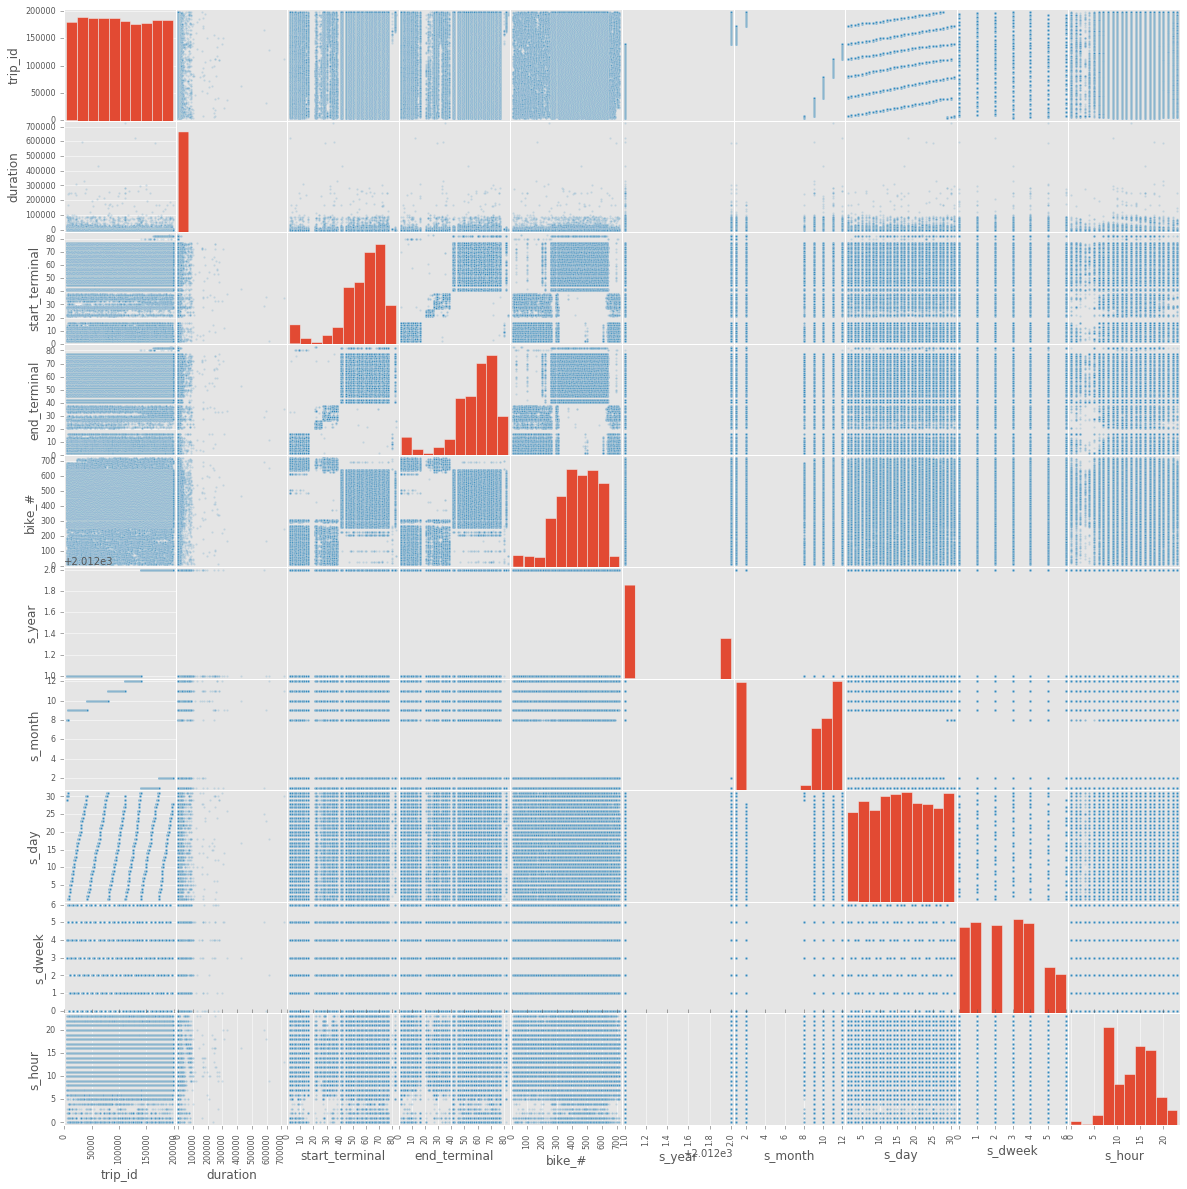

In [28]:
scatter_matrix(df, figsize=(20, 20), alpha=0.2);

#### EDA - Monthly distribution

In [30]:
monthly_users = df.groupby('s_month').count()

In [31]:
monthly_users

,trip_id,duration,start_date,start_station,start_terminal,end_date,end_station,end_terminal,bike_#,subscription_type,zip_code,s_year,s_mdy,s_day,s_dweek,s_hour
s_month,,,,,,,,,,,,,,,,
1,24428,24428,24428,24428,24428,24428,24428,24428,24428,24428,23789,24428,24428,24428,24428,24428
2,19024,19024,19024,19024,19024,19024,19024,19024,19024,19024,18487,19024,19024,19024,19024,19024
8,2102,2102,2102,2102,2102,2102,2102,2102,2102,2102,1916,2102,2102,2102,2102,2102
9,25243,25243,25243,25243,25243,25243,25243,25243,25243,25243,23377,25243,25243,25243,25243,25243
10,29105,29105,29105,29105,29105,29105,29105,29105,29105,29105,27822,29105,29105,29105,29105,29105
11,24219,24219,24219,24219,24219,24219,24219,24219,24219,24219,23309,24219,24219,24219,24219,24219
12,19894,19894,19894,19894,19894,19894,19894,19894,19894,19894,19185,19894,19894,19894,19894,19894


In [32]:
# monthly_users = df.groupby('s_month').count()['trip_id']
monthly_users = df.groupby('s_month').trip_id.count()

In [33]:
monthly_users

s_month
1     24428
2     19024
8      2102
9     25243
10    29105
11    24219
12    19894
Name: trip_id, dtype: int64

In [34]:
monthly_users.index

Int64Index([1, 2, 8, 9, 10, 11, 12], dtype='int64', name=u's_month')

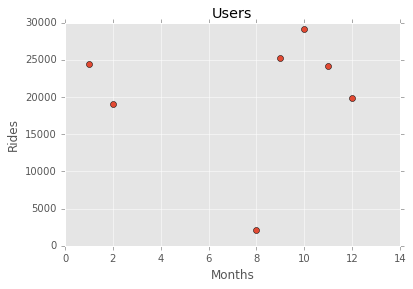

In [35]:
plt.plot(monthly_users.index, monthly_users, 'o',)
plt.xlim(0, 14)
plt.title('Users')
plt.xlabel('Months')
plt.ylabel('Rides');

In [198]:
# df.info()

#### Normal Process Variation X-R graph

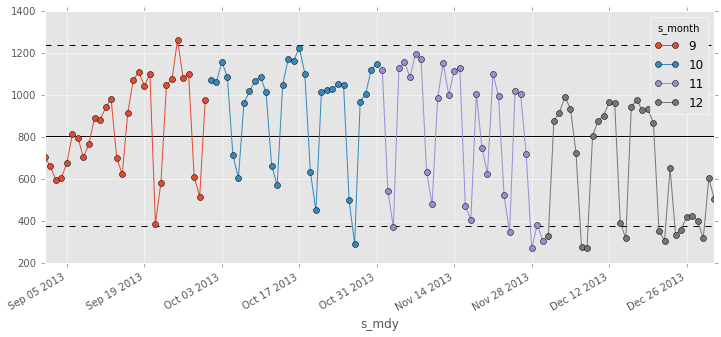

In [170]:
months = np.arange(9, 13)

df_variation = df[df.s_month.isin(months)].groupby(['s_month','s_mdy']).trip_id.count().unstack().T
variation_mean = df_variation.sum(axis=1).mean()
variation_std = df_variation.sum(axis=1).std()

fig, ax = plt.subplots(figsize=(12, 5))

df_variation.plot(ax=ax, marker='o')

ax.hlines(variation_mean, *plt.xlim())
ax.hlines(variation_mean + (1.5*variation_std), *plt.xlim(), linestyle='--')
ax.hlines(variation_mean - (1.5*variation_std), *plt.xlim(), linestyle='--')

fig.autofmt_xdate()
plt.show()

#### EDA - Weekly distribution 

In [36]:
weekdays = df[df.s_dweek < 5].groupby('s_mdy').trip_id.count()

In [37]:
weekdays[:2]

s_mdy
2013-08-29    748
2013-08-30    714
Name: trip_id, dtype: int64

In [38]:
weekends = df[df.s_dweek >= 5].groupby('s_mdy').trip_id.count()

In [39]:
weekends[:2]

s_mdy
2013-08-31    640
2013-09-01    706
Name: trip_id, dtype: int64

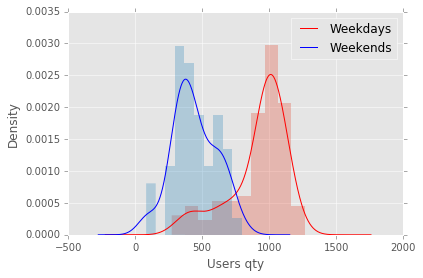

In [40]:
weekdays.hist(normed=True, alpha=0.3, edgecolor='none')
weekdays.plot(kind= 'kde', color='r', label= 'Weekdays')

weekends.hist(normed=True, alpha=0.3, edgecolor='none')
weekends.plot(kind= 'kde', color='b', label= 'Weekends')

# _ = plt.xlim(0, 1800)
_ = plt.ylim(0, 0.0035)

plt.xlabel('Users qty')
plt.legend()



In [197]:
# df[:2].T

In [60]:
weekdaydf = df[df.s_dweek < 5]

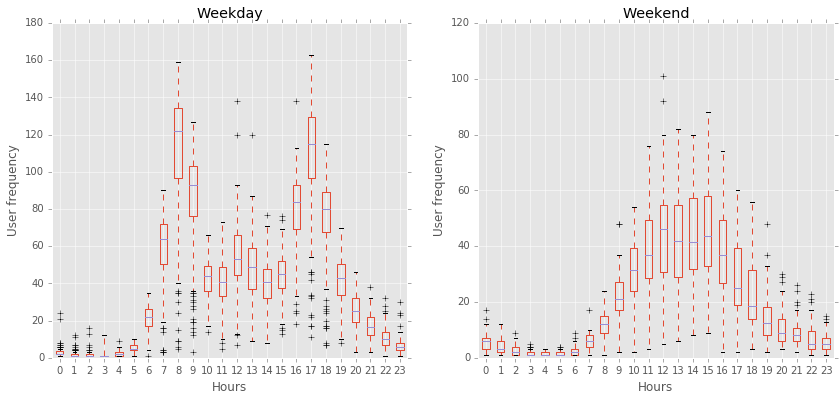

In [77]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
# df.groupby().col.count().unstack().boxplot()
df[df.s_dweek < 5].groupby(['s_mdy', 's_hour']).trip_id.count().unstack().boxplot(ax= axes[0])
df[df.s_dweek >=5].groupby(['s_mdy', 's_hour']).trip_id.count().unstack().boxplot(ax= axes[1])

title  = ['Weekday', 'Weekend']

for ax, t in zip(axes.ravel(), title):
    ax.set_xlabel('Hours')
    ax.set_ylabel('User frequency')
    ax.set_title(t)


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144015 entries, 0 to 144014
Data columns (total 17 columns):
trip_id              144015 non-null int64
duration             144015 non-null int64
start_date           144015 non-null datetime64[ns]
start_station        144015 non-null object
start_terminal       144015 non-null int64
end_date             144015 non-null datetime64[ns]
end_station          144015 non-null object
end_terminal         144015 non-null int64
bike_#               144015 non-null int64
subscription_type    144015 non-null category
zip_code             137885 non-null object
s_year               144015 non-null int32
s_mdy                144015 non-null object
s_month              144015 non-null int32
s_day                144015 non-null int32
s_dweek              144015 non-null int32
s_hour               144015 non-null int32
dtypes: category(1), datetime64[ns](2), int32(5), int64(5), object(4)
memory usage: 15.0+ MB


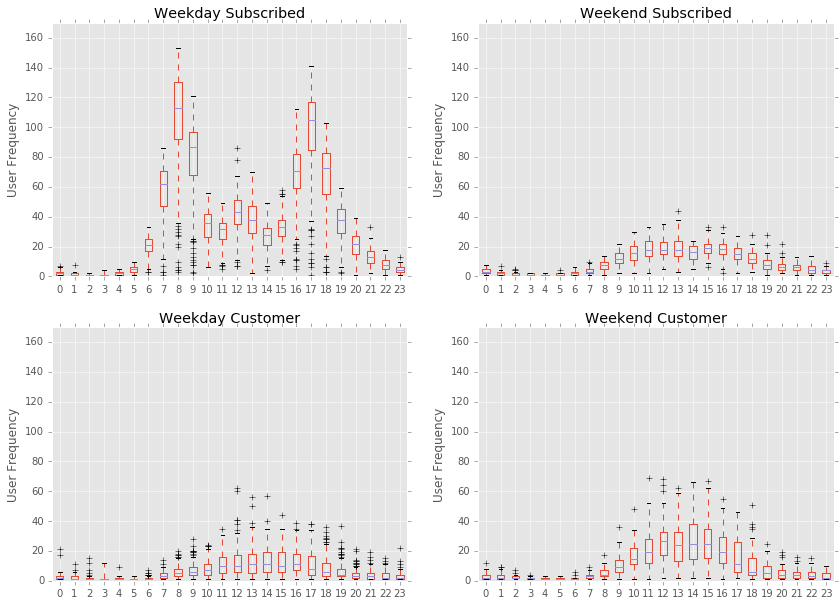

In [107]:
weekday_s = df[(df.s_dweek < 5) & (df.subscription_type == 'Subscriber')]
weekend_s = df[(df.s_dweek >= 5) & (df.subscription_type == 'Subscriber')]

weekday_c = df[(df.s_dweek < 5) & (df.subscription_type == 'Customer')]
weekend_c = df[(df.s_dweek >= 5) & (df.subscription_type == 'Customer')]

df_list = [weekday_s, weekend_s, weekday_c, weekend_c]

title = ['Weekday Subscribed', 'Weekend Subscribed', 'Weekday Customer', 'Weekend Customer']

fig, axes = plt.subplots(2, 2, figsize =(14, 10))

for ax, data, t in zip(axes.ravel(), df_list, title):
    data.groupby(['s_mdy', 's_hour']).trip_id.count().unstack().boxplot(ax=ax)
    ax.set_title(t)
    ax.set_ylabel('User Frequency')
    # standardizing y axis
    ax.set_ylim(top=170)


This graphs might be useful to suggest a timeframe for a marketing campaign for example.

#### EDA - Daily distribution

In [41]:
daily_users = df.groupby('s_mdy').trip_id.count()

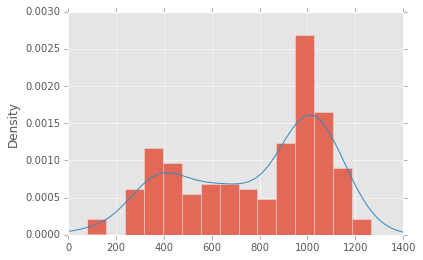

In [42]:
daily_users.hist(bins = 15, normed=True, alpha=0.8)
daily_users.plot(kind= 'kde')
_ = plt.xlim(0, 1400)

#### EDA - Hourly distribution

In [43]:
df.groupby(['s_mdy', 's_hour']).count().T[:2]

s_mdy    2013-08-29                                      ... 2014-02-28      \
s_hour           9   10  11   12  13  14  15  16  17  18 ...         14  15   
trip_id          12  14  42  120  87  50  62  61  88  68 ...         18  16   
duration         12  14  42  120  87  50  62  61  88  68 ...         18  16   

s_mdy                                  
s_hour    16  17  18  19  20 21 22 23  
trip_id   65  75  59  26  17  6  4  2  
duration  65  75  59  26  17  6  4  2  

[2 rows x 4008 columns]

In [44]:
df.groupby(['s_mdy', 's_hour']).trip_id.count()[:2]

s_mdy       s_hour
2013-08-29  9         12
            10        14
Name: trip_id, dtype: int64

[unstack](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html)

In [45]:
# Pivot a level of the (necessarily hierarchical) index labels
df.groupby(['s_mdy', 's_hour']).trip_id.count().unstack()[:2]

s_hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
s_mdy,,,,,,,,,,,,,,,,,,,,,
2013-08-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,...,50.0,62.0,61.0,88.0,68.0,59.0,36.0,25.0,20.0,4.0
2013-08-30,1.0,1.0,2.0,1.0,NaN,2.0,8.0,14.0,36.0,30.0,...,54.0,51.0,60.0,54.0,72.0,50.0,16.0,19.0,13.0,11.0


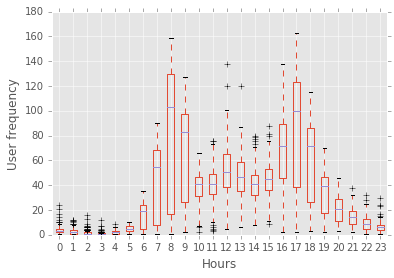

In [48]:
df.groupby(['s_mdy', 's_hour']).trip_id.count().unstack().boxplot()
_ = plt.xlabel('Hours')
_ = plt.ylabel('User frequency')

In [173]:
dfs = pd.read_csv('la_station.csv')

In [194]:
# dfs[:2].T

In [195]:
# df.info()

In [188]:
df.start_terminal.isin(dfs.station_id).sum()

144015

In [185]:
df.start_station.isin(dfs.name).sum()

144015

In [196]:
# dfs.info()

#### Merging two df

In [189]:
dft = df.merge(dfs, left_on=['start_terminal', 'start_station'], right_on=['station_id', 'name'])

#### Matplotlib Basemap

[Basemap toolkit](https://matplotlib.org/basemap/api/basemap_api.html)

[Basemap tutorial](http://basemaptutorial.readthedocs.io/en/latest/plotting_data.html)

In [223]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144015 entries, 0 to 144014
Data columns (total 24 columns):
trip_id              144015 non-null int64
duration             144015 non-null int64
start_date           144015 non-null datetime64[ns]
start_station        144015 non-null object
start_terminal       144015 non-null int64
end_date             144015 non-null datetime64[ns]
end_station          144015 non-null object
end_terminal         144015 non-null int64
bike_#               144015 non-null int64
subscription_type    144015 non-null object
zip_code             137885 non-null object
s_year               144015 non-null int32
s_mdy                144015 non-null object
s_month              144015 non-null int32
s_day                144015 non-null int32
s_dweek              144015 non-null int32
s_hour               144015 non-null int32
station_id           144015 non-null int64
name                 144015 non-null object
lat                  144015 non-null float64
lon

In [227]:
dft.groupby('name')['lat', 'long', 'dockcount'].first()[:2]

,lat,long,dockcount
name,,,
2nd at Folsom,37.785299,-122.396236,19
2nd at South Park,37.782259,-122.392738,15


In [237]:
grouped = dft.groupby('name')['lat', 'long', 'dockcount'].first()

In [238]:
grouped.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69 entries, 2nd at Folsom to Yerba Buena Center of the Arts (3rd @ Howard)
Data columns (total 3 columns):
lat          69 non-null float64
long         69 non-null float64
dockcount    69 non-null int64
dtypes: float64(2), int64(1)
memory usage: 2.2+ KB


In [212]:
dft.dockcount.unique()

array([19, 15, 23, 11, 27, 25])

In [208]:
dft.lat.max()

37.804769999999998

In [209]:
dft.lat.min()

37.329732

In [206]:
dft.long.max()

-121.877349

In [207]:
dft.long.min()

-122.418954

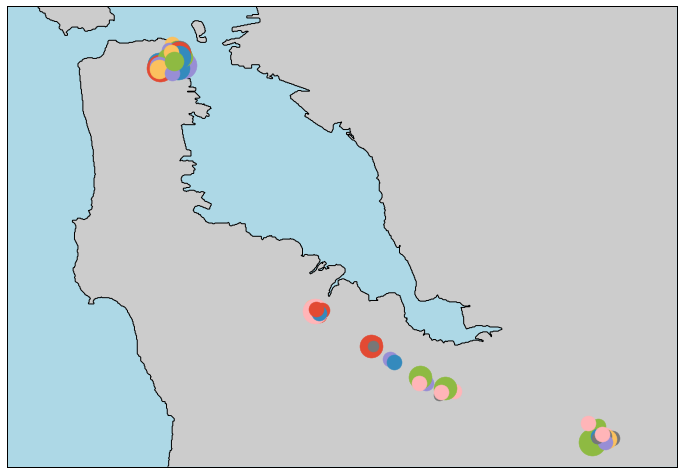

In [264]:
fig, ax = plt.subplots(figsize=(12, 12))

# note: for Basemap resolution test with 'l' or 'i' and finish with 'f'
bmap = Basemap(ax=ax, projection='cyl', resolution='f',
              llcrnrlon= -122.6, llcrnrlat=37.3,
              urcrnrlon= -121.8, urcrnrlat=37.85)

bmap.drawmapboundary(fill_color='lightblue')
bmap.drawcoastlines()
bmap.drawstates()
bmap.fillcontinents()

# grouped df
grouped = dft.groupby('name')['lat', 'long', 'dockcount'].first()

for station, coor in grouped.iterrows():
    bmap.plot(coor['long'], coor['lat'], '.', markersize=coor.dockcount*2)

#### Regression

[StatsModels Datasets - Prestige](http://www.statsmodels.org/dev/datasets/index.html)

```
import statsmodels.api as sm
```

In [11]:
dfp = sm.datasets.get_rdataset('Duncan', 'car', cache=True).data

In [12]:
dfp.describe().T

,count,mean,std,min,25%,50%,75%,max
income,45.0,41.866667,24.435072,7.0,21.0,42.0,64.0,81.0
education,45.0,52.555556,29.760831,7.0,26.0,45.0,84.0,100.0
prestige,45.0,47.688889,31.510332,3.0,16.0,41.0,81.0,97.0


In [13]:
dfp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45 entries, accountant to waiter
Data columns (total 4 columns):
type         45 non-null object
income       45 non-null int64
education    45 non-null int64
prestige     45 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.8+ KB


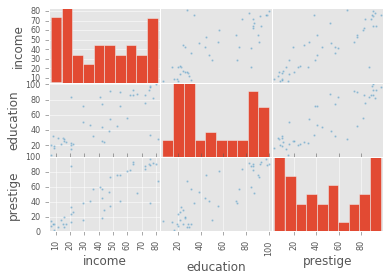

In [14]:
scatter_matrix(dfp);

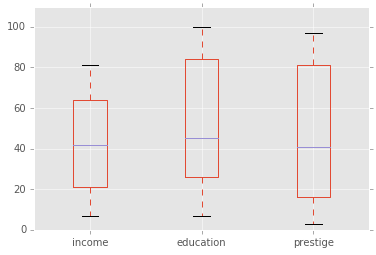

In [15]:
dfp.boxplot();
_ = plt.ylim(0, 110)

$$\boldsymbol{Y_i = \beta_0 + \sum_{j=1}^p {\beta_j X_{i,j}} + \varepsilon_i}$$

```
-As for income and education, it will be the values where if you increase either income or education by 1 value, it will increase by 0.6 and 0.546 respectively if the other is held constant.
```

$$\hat{\boldsymbol\beta} = (\mathbf{X}^{\rm T}\mathbf{X})^{-1} \mathbf{X}^{\rm T}\mathbf{y}$$




In [16]:
X = dfp[['income', 'education']].astype(float)

In [17]:
# Adding a constant in order to fit an intercept.
X = sm.add_constant(X)

In [18]:
X[:2]

,const,income,education
accountant,1,62.0,86.0
pilot,1,72.0,76.0


In [19]:
y = dfp.prestige

Just for fun

In [20]:
def beta_coeff(xdf, y):
    betas = np.linalg.inv(xdf.transpose().dot(xdf)).dot(xdf.transpose()).dot(y)
    return betas

In [21]:
beta = beta_coeff(X, y)
beta

array([-6.06466292,  0.59873282,  0.54583391])


$\boldsymbol{r_{i} = y_{i}-f(x_{i},{\boldsymbol \beta })}$


$\boldsymbol{\hat{y}} = \boldsymbol{f(x_{i}, {\beta})} = \boldsymbol{\beta_0+\beta_1 x}$ 

$\bar{y}=\frac{1}{n}\sum_{i=1}^n y_i$

The sum of squares of residuals, also called the residual sum of squares:

$SS_\text{res}=\sum_i (y_i - \hat{Y_i})^2=\sum_i e_i^2\ $  

The total sum of squares (proportional to the variance of the data):

$SS_\text{tot}=\sum_i (y_i-\bar{y})^2$  

The most general definition of the **coefficient of determination** 

$R^2 \equiv 1 - {SS_{\rm res}\over SS_{\rm tot}}$ 



In [22]:
# predictions
y_hat = beta[0] + beta[1]*X['income'] + beta[2]*X['education']
y_hat[:3]

accountant    77.998488
pilot         78.527477
architect     89.057018
dtype: float64

In [23]:
residuals = np.sum((y - y_hat)**2)
residuals

7506.698653094498

In [24]:
tss = np.sum((y - np.mean(y))**2)
tss

43687.64444444444

In [25]:
rsq = 1 - (residuals / tss)

In [26]:

rsq

0.8281734172543814

The model with those beta coefficients explains the 82.8% of the variablity of the dependent variable y: dfp.prestige

#### [StatsModels](https://www.statsmodels.org/stable/index.html)

In [27]:
model = sm.OLS(y, X)

In [28]:
results = model.fit()

In [29]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               prestige   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     101.2
Date:                Thu, 31 May 2018   Prob (F-statistic):           8.65e-17
Time:                        13:43:40   Log-Likelihood:                -178.98
No. Observations:                  45   AIC:                             364.0
Df Residuals:                      42   BIC:                             369.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -6.0647      4.272     -1.420      0.163       -14.686     2.556
income         0.5987      0.120      5.003      0.000         0.357     0.840
education      0.5458      0.098      5.555      0.000         0.348     0.744
==============================================================================
Omnibus:                        1.279   Durbin-Watson:                   1.458
Prob(Omnibus):                  0.528   Jarque-Bera (JB):                0.520
Skew:                           0.155   Prob(JB):                        0.771
Kurtosis:                       3.426   Cond. No.                         163.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1]:
-6.0647 / 4.272

-1.4196395131086141